<a href="https://colab.research.google.com/github/DuongTam1410/VGG/blob/main/vgg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [332]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import plot_model
import numpy as np

In [333]:
model = VGG16()

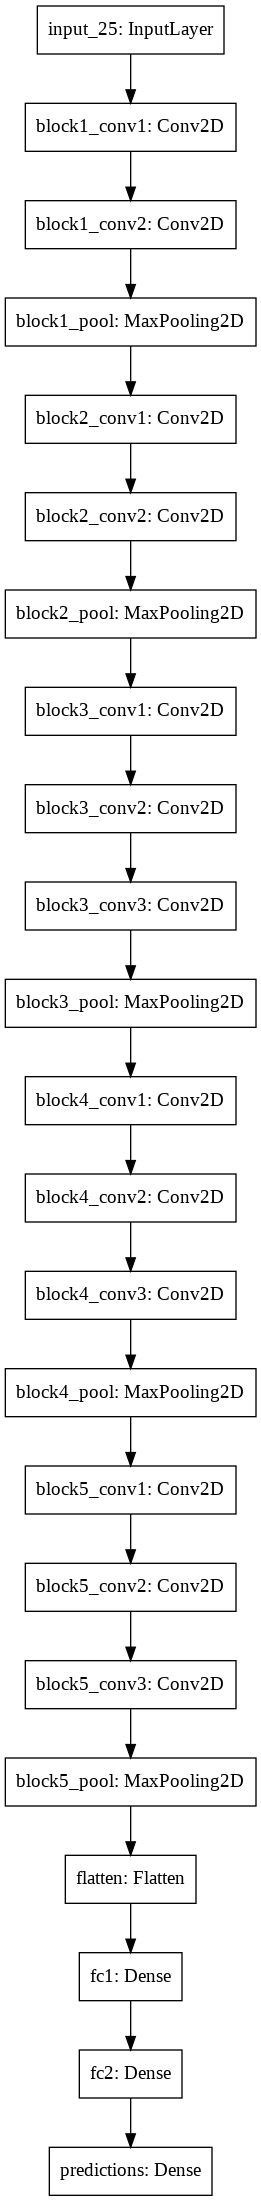

In [334]:
plot_model(model, to_file='vgg_model.png')

In [335]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_25 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [336]:
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt

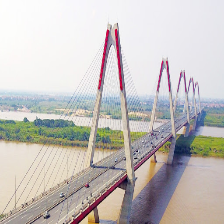

In [337]:
# Create a list to store the urls of the images
urls = "https://lh3.googleusercontent.com/proxy/Ks8rcLDRh9ry0_Pk00ruZTQTrxaCqH_ASSInnrqCm61CuiBE7k5UaiuQrCGdKvllFgwGoHjl5a-NHg3LzcV2eTEiut5HIOBZInh-kgMXCaHO1Q"
# Read and display the image
# loop over the image URLs, you could store several image urls in the list
image = io.imread(urls)
image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_3 = cv.resize(image_2,(224,224))
cv2_imshow(image_3)
print('\n')

In [338]:
#The img_to_array() function adds channels: (224, 224, 3) for RGB #and (224, 224, 1) for gray image.
from tensorflow.keras.preprocessing import image


In [339]:
transformedImage = image.img_to_array(image_3)
print(transformedImage.shape)
print(transformedImage)

(224, 224, 3)
[[[252. 254. 254.]
  [252. 254. 254.]
  [254. 254. 254.]
  ...
  [238. 230. 230.]
  [238. 230. 230.]
  [238. 230. 230.]]

 [[252. 254. 254.]
  [252. 254. 254.]
  [254. 254. 254.]
  ...
  [238. 230. 230.]
  [238. 230. 230.]
  [238. 230. 230.]]

 [[252. 254. 254.]
  [252. 254. 254.]
  [254. 254. 254.]
  ...
  [238. 230. 230.]
  [238. 230. 230.]
  [238. 230. 230.]]

 ...

 [[130. 140. 157.]
  [102. 111. 124.]
  [181. 189. 202.]
  ...
  [149. 174. 192.]
  [154. 174. 191.]
  [155. 170. 189.]]

 [[171. 181. 199.]
  [175. 185. 198.]
  [154. 162. 175.]
  ...
  [148. 173. 191.]
  [153. 173. 190.]
  [155. 169. 189.]]

 [[152. 160. 178.]
  [141. 149. 162.]
  [139. 145. 158.]
  ...
  [150. 172. 190.]
  [155. 173. 190.]
  [155. 169. 190.]]]


In [340]:
transformedImage = np.expand_dims(transformedImage, axis = 0)
print(transformedImage.shape)

(1, 224, 224, 3)


In [341]:
transformedImage = preprocess_input(transformedImage)
print(transformedImage)

[[[[150.061     137.22101   128.32     ]
   [150.061     137.22101   128.32     ]
   [150.061     137.22101   130.32     ]
   ...
   [126.061     113.221     114.32     ]
   [126.061     113.221     114.32     ]
   [126.061     113.221     114.32     ]]

  [[150.061     137.22101   128.32     ]
   [150.061     137.22101   128.32     ]
   [150.061     137.22101   130.32     ]
   ...
   [126.061     113.221     114.32     ]
   [126.061     113.221     114.32     ]
   [126.061     113.221     114.32     ]]

  [[150.061     137.22101   128.32     ]
   [150.061     137.22101   128.32     ]
   [150.061     137.22101   130.32     ]
   ...
   [126.061     113.221     114.32     ]
   [126.061     113.221     114.32     ]
   [126.061     113.221     114.32     ]]

  ...

  [[ 53.060997   23.221       6.3199997]
   [ 20.060997   -5.7789993 -21.68     ]
   [ 98.061      72.221      57.32     ]
   ...
   [ 88.061      57.221      25.32     ]
   [ 87.061      57.221      30.32     ]
   [ 85.061     

In [342]:
#predict() function classify input image in 1000 possible classes.
prediction = model.predict(transformedImage)
#print(prediction)
print(prediction.shape)

(1, 1000)


In [343]:
from tensorflow.keras.applications.vgg16 import decode_predictions
'''
decode_predictions: Decodes the prediction of an ImageNet model. 

Arguments:
    preds:  Numpy array encoding a batch of predictions.
    top:     Integer, how many top-guesses to return. Defaults to 5. 

Returns: A list of lists of top class prediction tuples (class_name, class_description, score).
'''
predictionLabel = decode_predictions(prediction, top = 10)
print(predictionLabel)


[[('n04366367', 'suspension_bridge', 0.42302316), ('n03933933', 'pier', 0.16175598), ('n03095699', 'container_ship', 0.10464438), ('n03126707', 'crane', 0.062145606), ('n03216828', 'dock', 0.054721214), ('n02894605', 'breakwater', 0.038521454), ('n04606251', 'wreck', 0.016511906), ('n04371774', 'swing', 0.01367176), ('n09428293', 'seashore', 0.013146649), ('n03673027', 'liner', 0.009747549)]]


In [344]:
#print first prediction probality
print('%s (%.2f%%)' % (predictionLabel[0][0][1], predictionLabel[0][0][2]*100 ))

suspension_bridge (42.30%)
